# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
# Create a new dataframe from your CSV
nyc_rats = pd.read_csv('Rat_Sightings.csv')

In [2]:
# Print out any information you need to understand your dataframe
nyc_rats.shape
len (nyc_rats.columns)
nyc_rats.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

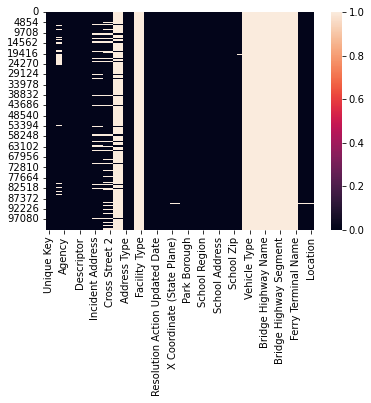

In [3]:
# Plot a heatmap of any missing data
cols = nyc_rats.columns[:53]
colours = ['#000099', '#ffff00']
sns.heatmap(nyc_rats[cols].isnull())

In [4]:
# Try out a missing data percentage list! 
for col in nyc_rats.columns:
    pct_missing = np.mean(nyc_rats[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

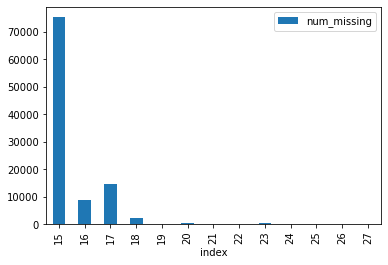

In [5]:
# Plot a missing data histogram
for col in nyc_rats.columns:
    missing = nyc_rats[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        nyc_rats['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in nyc_rats.columns if 'ismissing' in col]
nyc_rats['num_missing'] = nyc_rats[ismissing_cols].sum(axis=1)

nyc_rats['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [6]:
# Handle any missing data in your dataframe.
cols_to_drop = ['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type', 'School or Citywide Complaint', 'School or Citywide Complaint',
'Vehicle Type',
'Taxi Company Borough',
'Taxi Pick Up Location',
'Bridge Highway Name',
'Bridge Highway Direction',
'Road Ramp',
'Bridge Highway Segment',
'Garage Lot Name',
'Ferry Direction',
'Ferry Terminal Name']
less_nyc_data = nyc_rats.drop(cols_to_drop, axis=1)
cols_to_drop

['Intersection Street 1',
 'Intersection Street 2',
 'Landmark',
 'Facility Type',
 'School or Citywide Complaint',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name']

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

array([[<AxesSubplot:title={'center':'Unique Key'}>,
        <AxesSubplot:title={'center':'Incident Zip'}>,
        <AxesSubplot:title={'center':'Facility Type'}>,
        <AxesSubplot:title={'center':'X Coordinate (State Plane)'}>],
       [<AxesSubplot:title={'center':'Y Coordinate (State Plane)'}>,
        <AxesSubplot:title={'center':'School or Citywide Complaint'}>,
        <AxesSubplot:title={'center':'Vehicle Type'}>,
        <AxesSubplot:title={'center':'Taxi Company Borough'}>],
       [<AxesSubplot:title={'center':'Taxi Pick Up Location'}>,
        <AxesSubplot:title={'center':'Bridge Highway Name'}>,
        <AxesSubplot:title={'center':'Bridge Highway Direction'}>,
        <AxesSubplot:title={'center':'Road Ramp'}>],
       [<AxesSubplot:title={'center':'Bridge Highway Segment'}>,
        <AxesSubplot:title={'center':'Garage Lot Name'}>,
        <AxesSubplot:title={'center':'Ferry Direction'}>,
        <AxesSubplot:title={'center':'Ferry Terminal Name'}>],
       [<AxesSubp

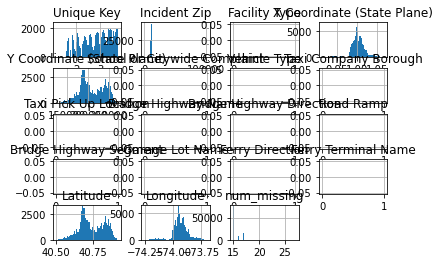

In [7]:
# Plot a histogram to see if there are any outliers.   
nyc_rats.hist(bins=100)

In [8]:
# Use the describe() method
nyc_rats.describe(include = 'all')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
count,1.019140e+05,101914,90983,101914,101914,101914,101914,101908,101578.000000,92840,...,101914,101914,101914,101914,101914,101914,101914,101914,101914,101914.000000
unique,NaN,9041,11507,1,1,1,1,20,NaN,51601,...,1,1,1,1,1,1,2,2,2,NaN
top,NaN,02/15/2017 12:00:00 AM,06/27/2012 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,NaN,2131 WALLACE AVENUE,...,True,True,True,True,True,True,False,False,False,NaN
freq,NaN,179,160,101914,101914,101914,101914,41061,NaN,186,...,101914,101914,101914,101914,101914,101914,101208,101208,101208,NaN
mean,2.815864e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10728.680895,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.491974
std,6.015376e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631.206648,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996092
min,1.146439e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
25%,2.341452e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10086.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
50%,2.883680e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10472.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
75%,3.346014e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11222.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000


<AxesSubplot:>

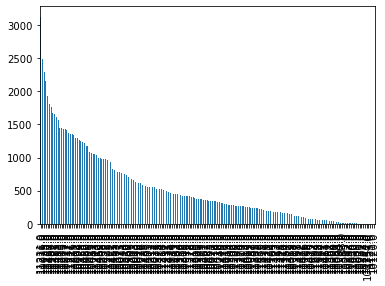

In [9]:
# Plot a bar chart
nyc_rats['Incident Zip'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe
nyc_rats = pd.DataFrame(np.random.randn(100, 3))

from scipy import stats
nyc_rats[(np.abs(stats.zscore(nyc_rats)) < 3).all(axis=1)]

,0,1,2
0,0.071983,-0.065099,-0.163796
1,0.795962,1.180888,0.165645
2,-0.586043,-1.573245,0.977549
3,0.173803,-0.733325,0.674162
4,0.228940,-0.135978,0.485129
...,...,...,...
95,-1.115380,2.573254,1.458887
96,-1.041397,-0.995981,-0.028253
97,1.863161,-0.482023,-0.376121
98,-0.095201,-1.845675,1.024918


## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [1]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(nyc_rats.index)
low_information_cols = [] #

for col in nyc_rats.columns:
    cnts = nyc_rats[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

NameError: name 'nyc_rats' is not defined

In [16]:
# Look for duplicates. How will you handle any duplicates?
nyc_rats_dedupped = nyc_rats.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(nyc_rats.shape)
print(nyc_rats_dedupped.shape)

KeyError: "['id'] not found in axis"

In [13]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [14]:
# Try to convert all the strings in a column to lower or upper case. 